Goal:

Apply Principal Component Analysis (PCA) to reduce dimensionality.
Retain the most informative principal components.
Visualize patterns in the dataset.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [22]:
data = pd.read_csv('biodegradation.csv')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SpMax_L             1055 non-null   float64
 1   J_Dz(e)             1055 non-null   float64
 2   nHM                 1055 non-null   int64  
 3   F01[N-N]            1055 non-null   int64  
 4   F04[C-N]            1055 non-null   int64  
 5   NssssC              1055 non-null   int64  
 6   nCb-                1055 non-null   int64  
 7   C%                  1055 non-null   float64
 8   nCp                 1055 non-null   int64  
 9   nO                  1055 non-null   int64  
 10  F03[C-N]            1055 non-null   int64  
 11  SdssC               1055 non-null   float64
 12  HyWi_B(m)           1055 non-null   float64
 13  LOC                 1055 non-null   float64
 14  SM6_L               1055 non-null   float64
 15  F03[C-O]            1055 non-null   int64  
 16  Me    

In [24]:
data.head(3)

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB


In [25]:
data['experimental classdata'] = data['experimental class'].map({'RB': 1, 'NRB':0})


In [26]:
data.head(3)

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental class,experimental classdata
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,2.949,1.591,0,7.253,0,0,RB,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,3.315,1.967,0,7.257,0,0,RB,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,1,3.076,2.417,0,7.601,0,0,RB,1


In [27]:
data.describe()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental classdata
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,...,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,...,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223,0.337441
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,...,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286,0.473061
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,...,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,...,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000,1.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,...,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000,1.000000


In [28]:
data.drop(columns=['experimental class'], inplace=True)



X = data.drop(columns=['experimental classdata'], axis=1)
y = data['experimental classdata']

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


In [31]:
eigenvalues = pca.explained_variance_

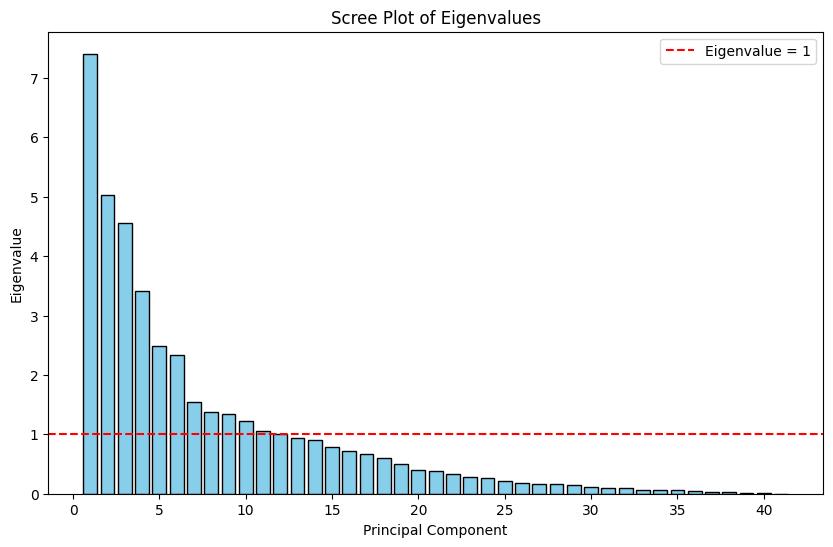

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, color="skyblue", edgecolor="black")
plt.axhline(y=1, color="r", linestyle="--", label="Eigenvalue = 1")
plt.title("Scree Plot of Eigenvalues")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.legend()
plt.show()


In [33]:
pca = PCA(n_components= 11)
X_reduced = pca.fit_transform(X_scaled)


In [34]:
features = data.columns[:-1]  
pca_components = pd.DataFrame(pca.components_, columns=features)
print(pca_components)


     SpMax_L   J_Dz(e)       nHM  F01[N-N]  F04[C-N]    NssssC      nCb-  \
0   0.272092 -0.008471  0.181890  0.081427  0.184254  0.085311  0.269563   
1   0.100331  0.247952 -0.100006  0.042758  0.043085  0.218281 -0.075415   
2  -0.095554 -0.196926 -0.202281  0.212017  0.320514 -0.172650  0.078857   
3   0.056535 -0.084904 -0.146361 -0.141483 -0.127859 -0.115144  0.021405   
4  -0.254427  0.056994  0.103777  0.116450  0.045863 -0.235418 -0.053998   
5   0.045911  0.020541 -0.013800  0.111966  0.117222  0.257847 -0.122026   
6  -0.109043  0.027233  0.310787  0.140151 -0.038403 -0.085356  0.069999   
7   0.067303 -0.087925 -0.050675  0.247294 -0.139483  0.149106  0.299903   
8   0.089397  0.268219 -0.128662 -0.171172 -0.018723  0.009093  0.117098   
9   0.127491 -0.034672  0.187631  0.036530 -0.042222 -0.072235 -0.258606   
10  0.040799  0.088447 -0.112289  0.412765 -0.056255  0.019401 -0.060906   

          C%       nCp        nO  ...      nCrt     C-026  F02[C-N]     nHDon  \
0   0.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2)



In [38]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       138
           1       0.90      0.77      0.83        73

    accuracy                           0.89       211
   macro avg       0.89      0.86      0.87       211
weighted avg       0.89      0.89      0.89       211

Accuracy Score: 0.8909952606635071
